In [1]:
import numpy as np
import scipy.io
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
def loss_hesapla(thetas,X,Y):
    return np.sum(((X.dot(thetas.T)-Y)**2)/(2*X.shape[0]))

In [3]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=0.1):
    temp = thetas.copy()
    temp[0,0] = 0.0
    return (np.sum(((X.dot(thetas.T)-Y)**2))+reg_katsayi*np.sum(temp**2))/(2*X.shape[0])

In [4]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=0.01,lr=0.1):
    temp = thetas[0,0:1]*lr*reg_katsayi/X.shape[0]
    thetas = thetas*(1-lr*reg_katsayi/X.shape[0]) - (2*(X.dot(thetas.T)-Y).T.dot(X)*lr)/X.shape[0]
    thetas[0,0:1] += temp
    return thetas

In [5]:
data = scipy.io.loadmat('ex5data1.mat')
x_train = data['X']
y_train = data['y']
x_val = data['Xval']
y_val = data['yval']
x_test = data['Xtest']
y_test = data['ytest']

In [6]:
rang = x_train.max() - x_train.min()
x_train = (x_train-x_train.mean())/rang

rang = x_val.max() - x_val.min()
x_val = (x_val-x_val.mean())/rang

rang = x_test.max() - x_test.min()
x_test = (x_test-x_test.mean())/rang

In [7]:
x_train = np.concatenate([np.ones((x_train.shape[0],1)),x_train],axis=1)
x_val = np.concatenate([np.ones((x_val.shape[0],1)),x_val],axis=1)
x_test = np.concatenate([np.ones((x_test.shape[0],1)),x_test],axis=1)

### Regüralizasyon ile Lineer Regresyon için ideal reg_degerinin bulunması

In [8]:
iterasyon = 5000

In [9]:
#reg_values = [0,0.001,0.01,0.1,1,10,100,1000]
reg_values = list(range(11))

In [10]:
son_losslar_train = list()
son_losslar_val = list()
for reg_value in reg_values:
    np.random.seed(1234)
    #thetas = np.array([[1,1]])
    thetas = np.random.rand(1,(x_train.shape[1]))
    for i in range(iterasyon):
        thetas = gradient_descent_reg(thetas,x_train,y_train,lr=0.01,reg_katsayi=reg_value)
    son_losslar_train.append(loss_hesapla_reg(thetas,x_train,y_train))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

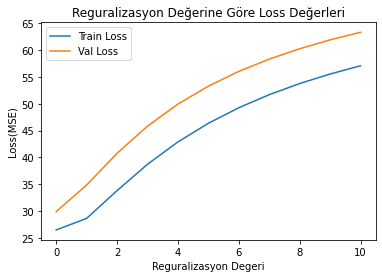

In [11]:
plt.plot(reg_values,son_losslar_train)
plt.plot(reg_values,son_losslar_val)
plt.xlabel("Reguralizasyon Degeri")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Reguralizasyon Değerine Göre Loss Değerleri")
plt.show()

### İdeal reg değeri ile modelin eğitilmesi

In [12]:
iterasyon = 5000
train_losses = list()
val_losses = list()
np.random.seed(1234)
thetas = np.random.rand(1,(x_train.shape[1]))

In [13]:
for i in range(iterasyon):
    thetas = gradient_descent_reg(thetas,x_train,y_train,lr=0.01,reg_katsayi=son_losslar_val.index(min(son_losslar_val)))
    train_losses.append(loss_hesapla_reg(thetas,x_train,y_train))
    val_losses.append(loss_hesapla(thetas,x_val,y_val))
    if(i%100 == 0):
        train_loss = loss_hesapla_reg(thetas,x_train,y_train)
        val_loss = loss_hesapla(thetas,x_val,y_val)
        print("{0}.iterasyon, Train Loss = {1}, Val Loss = {2}".format(i,train_loss,val_loss))

0.iterasyon, Train Loss = 133.99919464644628, Val Loss = 156.729496531184
100.iterasyon, Train Loss = 57.537413071933685, Val Loss = 66.24370864448635
200.iterasyon, Train Loss = 44.61022916485368, Val Loss = 51.92589232428584
300.iterasyon, Train Loss = 37.20442392495329, Val Loss = 44.34014245871118
400.iterasyon, Train Loss = 32.661684933372946, Val Loss = 39.54117800091119
500.iterasyon, Train Loss = 29.899480600987122, Val Loss = 36.40908572477694
600.iterasyon, Train Loss = 28.24517659915777, Val Loss = 34.341678668055486
700.iterasyon, Train Loss = 27.27562259720359, Val Loss = 32.96558077933588
800.iterasyon, Train Loss = 26.72542001000875, Val Loss = 32.04167222236771
900.iterasyon, Train Loss = 26.428849960180724, Val Loss = 31.415396573210884
1000.iterasyon, Train Loss = 26.283035698753636, Val Loss = 30.98636649481615
1100.iterasyon, Train Loss = 26.224601832646613, Val Loss = 30.689078438214086
1200.iterasyon, Train Loss = 26.214908395234886, Val Loss = 30.48056702348936
1

### Train, Val, Test Loss Degerleri

In [14]:
for k,v in {"Train":[x_train,y_train],"Val":[x_val,y_val],"Test":[x_test,y_test]}.items():
    print(f"{k} Loss = {loss_hesapla(thetas,v[0],v[1]) if not k == 'Train' else loss_hesapla_reg(thetas,v[0],v[1])}")

Train Loss = 26.498702943035966
Val Loss = 29.906409673544434
Test Loss = 35.485517276995004


### İterasyonlara göre eğitim grafikleri

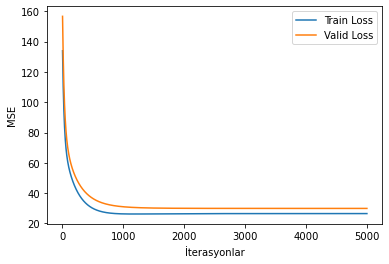

In [15]:
plt.plot(range(1,len(train_losses)+1),train_losses)
plt.plot(range(1,len(val_losses)+1),val_losses)
plt.xlabel("İterasyonlar")
plt.ylabel("MSE")
plt.legend(["Train Loss","Valid Loss"])
plt.show()

### Train, Val ve Test Verisetleri için Gerçek Değerler ve Hipotezler

In [16]:
x_range = np.linspace(x_val[:,1].min(),x_val[:,1].max(),100).reshape(-1,1)

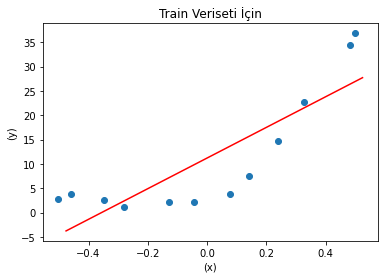

In [17]:
temp = np.concatenate([np.ones((x_range.shape[0],1)),x_range],axis=1)
plt.scatter(x_train[:,1],y_train)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Train Veriseti İçin")
plt.show()

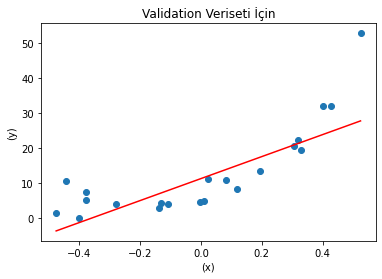

In [18]:
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Validation Veriseti İçin")
plt.show()

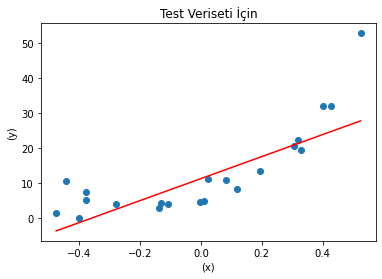

In [19]:
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("(x)")
plt.ylabel("(y)")
plt.title("Test Veriseti İçin")
plt.show()

### Örnek sayısının başarıma etkisi

In [20]:
np.random.seed(1234)

In [21]:
iterasyon = 5000
ornek_sayilari = range(1,x_train.shape[0]+1)

In [22]:
son_losslar_train = list()
son_losslar_val = list()
for ornek_sayisi in ornek_sayilari:
    thetas = np.random.rand(1,(x_train.shape[1]))
    for i in range(iterasyon):
        thetas = gradient_descent_reg(thetas,x_train[:ornek_sayisi,:],y_train[:ornek_sayisi,:],lr=0.01,reg_katsayi=0)
    son_losslar_train.append(loss_hesapla_reg(thetas,x_train[:ornek_sayisi,:],y_train[:ornek_sayisi,:]))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

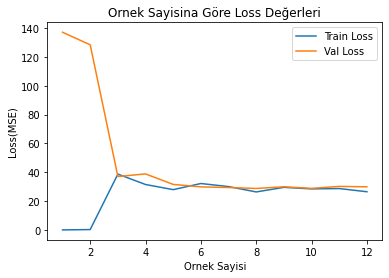

In [23]:
plt.plot(range(1,len(son_losslar_train)+1),son_losslar_train)
plt.plot(range(1,len(son_losslar_val)+1),son_losslar_val)
plt.xlabel("Ornek Sayisi")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Ornek Sayisina Göre Loss Değerleri")
plt.show()